# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('https://raw.githubusercontent.com/Patchwtf/MachineLearningProyects/refs/heads/main/Resources/car_evaluation.csv', header=None)

## Análisis exploratorio de datos

In [3]:
#Visualizacion del dataframe
df_car.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#Analizamos el shape del objeto
df_car.shape

(1728, 7)

In [5]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df_car.columns = col_names

In [6]:
#Vericamos la transformacion
df_car.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
#Visualizamos los tipos de datos
df_car.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [8]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [9]:
#Verificamos valores missings
df_car.isnull().sum()
df_car.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


## Procesamiento de datos

In [10]:
from os import X_OK
#Separamos en X e y
X = df_car.drop(columns=['class'], axis=1)
y = df_car['class']

In [11]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [12]:
#Veamos que obtuvimos
X_train.shape , X_test.shape

((1209, 6), (519, 6))

In [13]:
y_train.shape , y_test.shape

((1209,), (519,))

In [14]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [15]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


## Entrenamiento de modelo de clasificación con árbol de decisión

In [16]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [17]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
#Verificamos la transformacion
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [19]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo

tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [20]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
#Calculo de las predicciones en Train y Test | En especifico, arbol de decision
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [22]:
y_test_pred_tree

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'ac

## Evaluación de modelo de clasificación con árbol de decisión

In [23]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print(f'El accuracy en train es: {train_accuracy_tree}\nEl accuracy en test es: {test_accuracy_tree}')

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


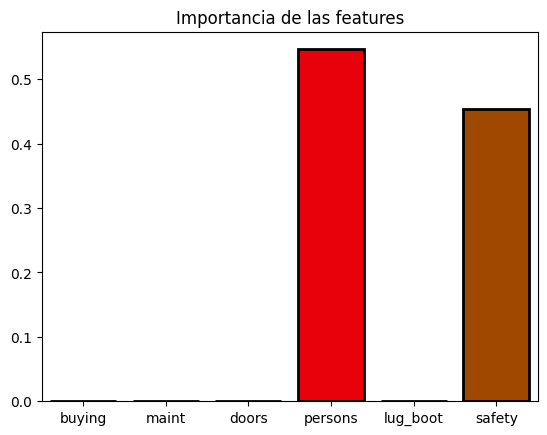

In [24]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de las features')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [46]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, random_state=0)

random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [47]:
#Calculo de las predicciones en Train y Test

y_train_pred_random = random_forest.predict(X_train)
y_test_pred_random = random_forest.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [48]:
#Calculo de metricas

#Calculo el accuracy en Train
train_accuracy_random = accuracy_score(y_train, y_train_pred_random)
#Calculo el accuracy en Test
test_accuracy_random = accuracy_score(y_test, y_test_pred_random)

print(f'El accuracy en train es: {train_accuracy_random}\nEl accuracy en test es: {test_accuracy_random}')

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El accuracy en train es: 0.9942100909842845
El accuracy en test es: 0.8863198458574181


In [49]:
# Visualizacion de las feature importantes
features_scores = pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)
features_scores

,0
safety,0.254441
buying,0.226386
persons,0.212589
maint,0.140068
lug_boot,0.090112
doors,0.076404


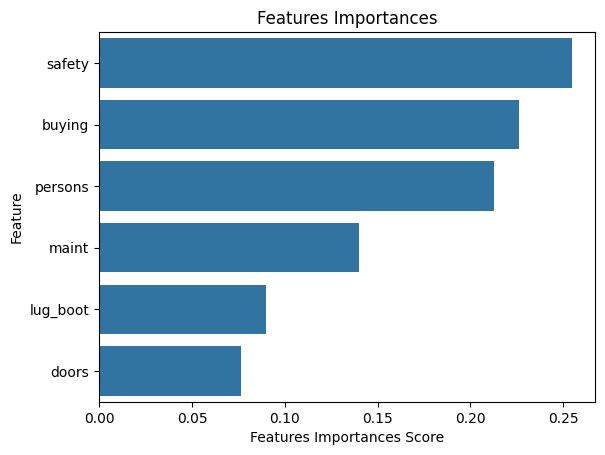

In [52]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Features Importances Score')
plt.ylabel('Feature')
plt.title('Features Importances')
plt.show()

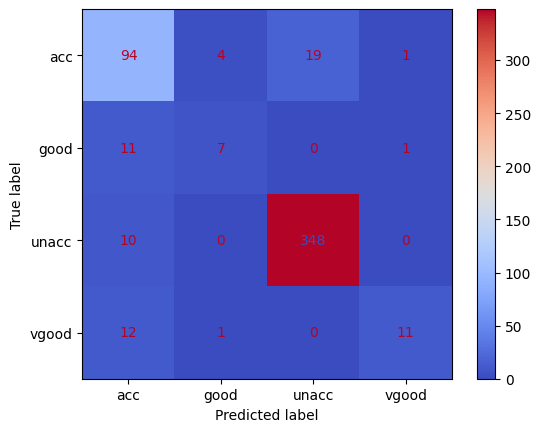

In [66]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)

cm = confusion_matrix(y_test, y_test_pred_random)

#print('Confusion Matrix\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp.plot(cmap='coolwarm')
#plot_confusion_matrix(random_forest, X_test, y_test.values.reshape(-1,1).ravel())

In [57]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_random))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

